## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [99]:
# x = np.array([2,1])
# x = np.expand_dims(x, axis=1) # shape(N, 1)
# print(x.shape)
# feat = [x]
# for i in range(2, 5):
#     feat.append(x ** i)

# res = np.concatenate(feat, axis=1)
# res.shape

# feat = [x]
# type(feat)


In [100]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    '''多项式基函数即对样本生成不同维度表示'''
    #todo '''请实现多项式基函数'''
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    #==========
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    x = np.expand_dims(x, axis=1)
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    
    x = np.concatenate([x]*feature_num, axis=1)
    out = (x-centers)/width
    #==========
    ret = np.exp(-0.5 * out**2)
    return ret

In [101]:
# # 程序主入口（建议不要改动以下函数的接口）
# if __name__ == '__main__':
#     train_file = 'train.txt'
#     test_file = 'test.txt'
#     # 载入数据
#     x_train, y_train = load_data(train_file)
#     x_test, y_test = load_data(test_file)
#     print(x_train.shape)
#     print(x_test.shape)

# x_train[0]
# w = np.zeros(2)
# w.shape

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [102]:
x = np.array([1,2])
y = np.expand_dims(np.ones_like(x), axis=1)
x = np.array([[4], [5]])
z = np.concatenate([x, y], axis=1)
z[0].shape[0], z[1].T.shape

(2, (2,))

In [103]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = multinomial_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) #shape(N, 1)
    phi1 = basis_func(x_train) #shape(N, feature_num)
    phi = np.concatenate([phi1, phi0], axis=1).T #shape(feature_num+1, N) 第二行均为1 增广权重向量
    
    
    #==========
    # #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    # '''method1 最小二乘'''
    # # 2xNxNx2x2xNxNx.
    # w = np.dot(np.dot(np.linalg.inv(np.dot(phi, phi.T)), phi), y_train)
    # #print("最小二乘得 w is: ", w)
    # '''最小二乘法并非如梯度下降般通过训练来求得最优解，而是直接通过数学计算计算出最优解'''
    
    '''method2 梯度下降'''
    training_loop = 10000
    learning_rate = 0.001
    
    w = np.zeros(phi.shape[0])
    #w = np.expand_dims(w, axis=1)
    for j in range(training_loop):
        # fnx1 + fnxNxNx1
        for i in range(len(x_train)):
            print(learning_rate * np.dot(phi.T[i], (y_train[i] - np.dot(phi.T[i], w))) )
            w = w + learning_rate * np.dot(phi.T[i], (y_train[i] - np.dot(phi.T[i], w)) )

    #print("finally w is: ", w)
    #==========
    
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x) # Nxfeature_num
        phi = np.concatenate([phi1, phi0], axis=1)
        y = np.dot(phi, w) #Nxfnxfnx1
        return y

    return f

SyntaxError: '(' was never closed (1677475434.py, line 29)

In [ ]:
# w = np.zeros([2,1])
# w, w.shape

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3508\3434647028.py:29: RuntimeWarning: invalid value encountered in add
  w = w + learning_rate * np.dot(phi.T[i], (y_train[i] - np.dot(phi.T[i], w)) )


训练集预测值与真实值的标准差：nan
预测值与真实值的标准差：nan


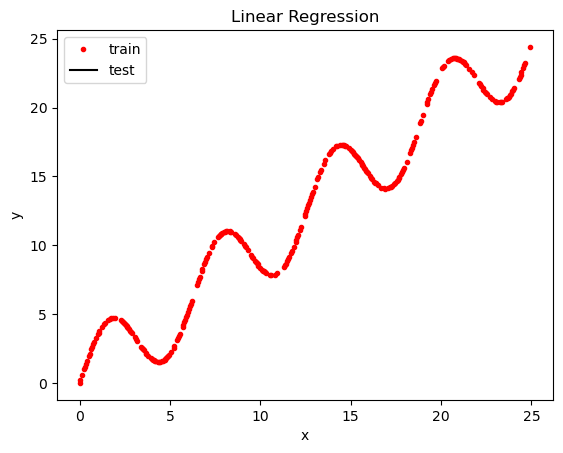

In [ ]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    #plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()